# Random Forrest

In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:

## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
print(len(data))
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
def lag_data(lag_count, df):
    features = []
    targets = []
    for i in range(1, lag_count+1):
        df['lag%s' % i] = df.Solar.shift(i)
        df['peek%s' % i] = df.Solar.shift(-1*i)
        features.append('lag%s' % i)
        targets.append('peek%s' % i)
        
    #differencing
    df['diff1'] = df.Solar.diff(1)
    return features, targets, df.iloc[lag_count:-1*lag_count] #dropped rows with nan
    
lag_count = 12
features, targets, data = lag_data(lag_count, data)

print(len(data))

315


In [4]:
print(features, targets)

['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'] ['peek1', 'peek2', 'peek3', 'peek4', 'peek5', 'peek6', 'peek7', 'peek8', 'peek9', 'peek10', 'peek11', 'peek12']


## Improve model by adding features

In [5]:
features.append("Price")
features.append("Solar")


In [6]:
#targets.append("Solar")
#print(features, targets)

In [7]:
X = data[features]
print(X.shape)
X.head()

(315, 14)


,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,Price,Solar
12,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,4.403,3.196,2.965,7.41,3.058
13,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,4.403,3.196,7.61,3.296
14,3.296,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,4.403,7.79,4.542
15,4.542,3.296,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,7.98,5.006
16,5.006,4.542,3.296,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,8.14,5.526


In [8]:
y = data[targets]
print(y.head())
row = [(y.iloc[303])[0]]
print(y.shape)
row


    peek1  peek2  peek3  peek4  peek5  peek6  peek7  peek8  peek9  peek10  \
12  3.296  4.542  5.006  5.526  5.576  5.853  5.793  5.283  4.815   3.950   
13  4.542  5.006  5.526  5.576  5.853  5.793  5.283  4.815  3.950   3.749   
14  5.006  5.526  5.576  5.853  5.793  5.283  4.815  3.950  3.749   3.168   
15  5.526  5.576  5.853  5.793  5.283  4.815  3.950  3.749  3.168   3.415   
16  5.576  5.853  5.793  5.283  4.815  3.950  3.749  3.168  3.415   4.705   

    peek11  peek12  
12   3.749   3.168  
13   3.168   3.415  
14   3.415   4.705  
15   4.705   5.185  
16   5.185   5.724  
(315, 12)


[15.97]

In [9]:
data[features].shape

(315, 14)

In [10]:
data[targets].shape

(315, 12)

In [11]:
X = data[["Price", "lag1", "peek1", "lag2", "peek2", "lag3", "peek3","lag4","peek4","lag5", "peek5","lag6", "peek6", "lag7", "peek7", "lag8", "peek8", "lag9", "peek9", "lag10","peek10", "lag11","peek11"]] 
y = data["Solar"].values.reshape(-1, 1)
print(X.shape, y.shape)

(315, 23) (315, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("X_train_scaled:", X_train_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)

X_train_scaled: (236, 23)
y_train_scaled: (236, 1)
X_test_scaled: (79, 23)
y_test_scaled: (79, 1)


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [16]:
import numpy as np
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
y_train_ravel = np.ravel(y_train_scaled)
y_test_ravel = np.ravel(y_test_scaled)
rf_random.fit(X_train_scaled, y_train_ravel)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.4s


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   5.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   5.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators

[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   2.7s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.2s
[CV] n_estimators

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.3s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   2.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   5.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   5.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimat

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   2.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.2s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.3s
[CV] n_est

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.2s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.6s
[CV] n_estimators=1600, mi

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   3.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   3.3s
[CV] n_estimators=2000

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [17]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [20]:
from sklearn.metrics import mean_squared_error

def evaluate(model, X_test_scaled, y_test_ravel):
    predictions = model.predict(X_test_scaled)
    errors = abs(predictions - y_test_ravel)
    mape = 100 * np.mean(errors / y_test_ravel)
    accuracy = 100 - mape
    MSE = mean_squared_error(y_test_ravel, predictions)
    r2 = model.score(X_test_scaled, y_test_ravel)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(f"MSE: {MSE}, R2: {r2}")
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_test_scaled, y_test_ravel)
base_accuracy = evaluate(base_model, X_test_scaled, y_test_ravel)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test_ravel)

redo_best = rf = RandomForestRegressor(bootstrap=False,max_depth=None,
                                       max_features="sqrt",
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       n_estimators=400)
redo_best.fit(X_train_scaled, y_train_ravel)
redo_accuracy = evaluate(redo_best, X_test_scaled, y_test_ravel)

print('redo best ', redo_accuracy)
print('best random ', random_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.0770 degrees.
Accuracy = 15.56%.
MSE: 0.02763757676971396, R2: 0.9783707086968303
Model Performance
Average Error: 0.0854 degrees.
Accuracy = 58.99%.
MSE: 0.032885843079600144, R2: 0.9742633919881696
Model Performance
Average Error: 0.0841 degrees.
Accuracy = 38.53%.
MSE: 0.03183079957357422, R2: 0.9750890737590244
redo best  38.53065500654359
best random  58.9904144202421
Improvement of 279.11%.


In [23]:

X_test

,Price,lag1,peek1,lag2,peek2,lag3,peek3,lag4,peek4,lag5,...,lag7,peek7,lag8,peek8,lag9,peek9,lag10,peek10,lag11,peek11
218,10.45,3.412,5.182,3.166,5.721,3.656,5.772,3.852,6.060,4.696,...,5.649,4.985,5.708,4.089,5.437,3.881,5.389,3.241,4.881,3.493
45,8.76,5.627,4.207,6.170,3.993,6.235,3.346,5.939,3.607,5.886,...,4.837,6.047,3.511,6.102,3.257,6.405,3.884,6.339,4.092,5.781
175,9.50,5.302,4.786,5.051,4.362,5.006,3.578,4.534,3.396,4.114,...,2.770,4.036,3.441,4.449,3.626,4.911,4.420,4.955,4.850,5.202
90,8.74,6.169,6.409,6.114,5.846,5.539,5.328,5.025,4.370,3.647,...,4.205,3.607,4.429,4.970,5.400,5.478,5.925,6.047,6.496,6.102
105,8.25,5.782,4.322,6.339,4.103,6.406,3.270,6.102,3.525,6.047,...,4.970,5.909,3.607,5.962,3.346,6.259,4.148,6.194,4.370,5.649
241,10.89,3.506,5.207,3.973,5.739,4.186,6.335,5.103,6.392,5.599,...,6.203,6.057,5.909,5.520,5.856,4.528,5.305,4.298,4.813,3.835
37,7.79,3.257,4.837,3.884,5.332,4.092,5.886,4.988,5.939,5.473,...,6.063,5.627,5.776,5.129,5.724,4.207,5.185,3.993,4.705,3.346
21,8.32,5.283,3.950,5.793,3.749,5.853,3.168,5.576,3.415,5.526,...,4.542,5.724,3.296,5.776,3.058,6.063,3.635,6.000,3.829,5.473
75,8.24,5.093,6.197,3.697,6.253,3.429,6.564,4.166,6.496,4.389,...,5.871,4.429,6.437,4.205,6.504,3.383,6.196,3.647,6.141,5.025
94,8.25,5.328,4.148,5.846,3.346,6.409,3.607,6.477,4.970,6.169,...,5.539,6.102,5.025,6.406,3.647,6.339,3.383,5.782,4.205,5.269


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [400]
}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [21]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train_ravel)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test_ravel)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))



Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.7s
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.7s
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   0.7s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


Model Performance
Average Error: 0.0845 degrees.
Accuracy = 73.26%.
MSE: 0.033382009265918146, R2: 0.9738750901096049
Improvement of 370.80%.


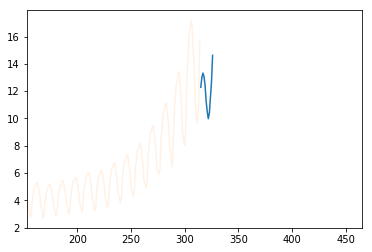

In [107]:
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
window = len(data) -  lag_count
rf.fit(data[features].values[:window], data[targets].values[:window])

plt.plot(
    range(window+lag_count,window+2*lag_count), 
    rf.predict([data[features].iloc[window]])[0]
)
plt.xlim(window-150,window+lag_count+150) #zoomed in so you can see prediction. comment-out this line if you want.
plt.plot(data.Solar.values,alpha=.1)
plt.show()


In [108]:

rf.score(data[features].values[window:], data[targets].values[window:])

0.13799998802928617

In [109]:
from sklearn.metrics import mean_squared_error

predictions = rf.predict(data[features].values[window:])
MSE = mean_squared_error(data[targets].values[window:], predictions)
r2 = rf.score(data[features].values[window:], data[targets].values[window:])

print(f"MSE: {MSE}, R2: {r2}")

MSE: 11.363848510833336, R2: 0.13799998802928617
